In [420]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Plotly Libraris
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode




In [421]:
df = pd.read_csv('Data/emision-co2-autos_limpio.csv')

In [422]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMATICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMATICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [423]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

In [424]:
df.shape

(432, 19)

In [425]:
# Total de datos faltantes
df.isna().any(axis=1).sum()

332

In [426]:
# Datos faltantes por columna
df.isna().sum()

vehiculo_marca                20
vehiculo_modelo               20
vehiculo_tipo                 20
vehiculo_traccion             20
vehiculo_id_motor             20
vehiculo_cilindrada           21
vehiculo_potencia            307
vehiculo_tipo_transmision     15
vehiculo_tipo_combustible     14
vehiculo_standard_emision     21
lca_numero                   139
fecha_firma                   28
ensayo_gei_numero             20
ensayo_gei_laboratorio        20
emision_CO2                   20
consumo_urbano                22
consumo_extraurbano           22
consumo_mixto                 20
id_etiqueta                   20
dtype: int64

In [427]:
# Elimino las columnas con mayor cantidad de datos faltantes y las que considero que no voy a utilizar para el análisis
df.drop(['vehiculo_potencia','lca_numero', 'vehiculo_id_motor','vehiculo_id_motor','fecha_firma','ensayo_gei_numero','ensayo_gei_laboratorio','id_etiqueta'], axis=1, inplace=True)

In [428]:
df.shape

(432, 12)

In [429]:
df.isna().any(axis=1).sum()

26

In [430]:
df.dropna(inplace=True)

In [431]:
df.reset_index(inplace = True)

In [432]:
df.shape

(406, 13)

In [433]:
df.isna().sum()

index                        0
vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
dtype: int64

In [434]:
df.head()

,index,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [435]:
df['vehiculo_marca'].value_counts()

MERCEDES-BENZ        31
HYUNDAI              31
CHEVROLET            25
BMW                  23
AUDI                 21
TOYOTA               20
FORD                 18
FIAT                 17
RENAULT              17
MINI                 16
VOLKSWAGEN           15
HONDA                15
PEUGEOT              13
NISSAN               12
CITROËN              10
CHANGAN               9
LIFAN                 8
LEXUS                 8
SUZUKI                7
JEEP                  7
LAND ROVER            6
PEUGEOT / CITROËN     6
FAW                   5
DOMY                  4
BAIC                  4
ALFA ROMEO            4
ZOTYE                 4
BORGWARD              4
MASERATI              4
JAC                   4
KIA                   3
MITSUBISHI            3
DS                    3
HAVAL                 3
PORSCHE               3
RAM                   2
MERCEDES-AMG          2
ZANELLA               2
CITROËN / DS          2
CHERY                 2
SUBARU                2
FOTON           

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

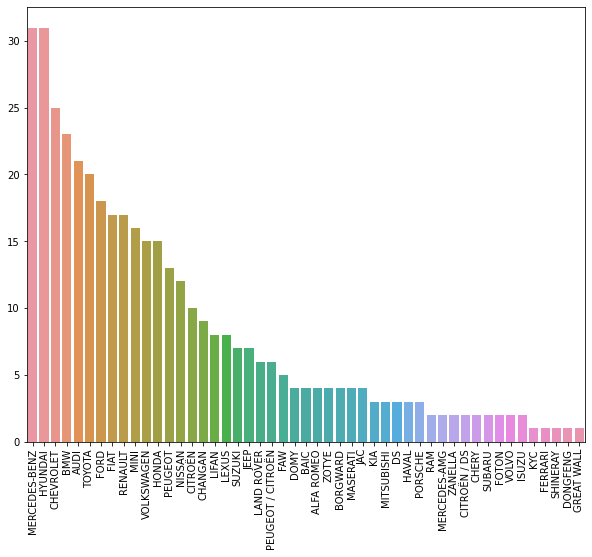

In [436]:
mkI = df['vehiculo_marca'].value_counts().index
mkV = df['vehiculo_marca'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkI,mkV)
plt.xticks(rotation='vertical')

In [437]:
df['vehiculo_marca'].unique()

array(['TOYOTA', 'RENAULT', 'CITROËN', 'LEXUS', 'PEUGEOT', 'FORD',
       'PEUGEOT / CITROËN', 'HYUNDAI', 'SUZUKI', 'CHEVROLET', 'LIFAN',
       'BMW', 'CITROËN / DS', 'HONDA', 'NISSAN', 'FIAT', 'CHERY',
       'VOLKSWAGEN', 'ALFA ROMEO', 'FAW', 'MERCEDES-BENZ', 'JEEP',
       'LAND ROVER', 'JAC', 'VOLVO', 'SHINERAY', 'CHANGAN', 'DS', 'MINI',
       'DOMY', 'BORGWARD', 'PORSCHE', 'AUDI', 'BAIC', 'ZANELLA', 'RAM',
       'FOTON', 'MASERATI', 'SUBARU', 'HAVAL', 'ISUZU', 'DONGFENG',
       'MERCEDES-AMG', 'MITSUBISHI', 'ZOTYE', 'KIA', 'GREAT WALL', 'KYC',
       'FERRARI'], dtype=object)

In [438]:
df_Make=df['vehiculo_marca'].value_counts().reset_index().rename(columns={'index':'vehiculo_marca','vehiculo_marca':'Count'})[0:25]
df_Make
fig = go.Figure(go.Bar(x=df_Make['vehiculo_marca'],y=df_Make['Count'],
        marker={'color': df_Make['Count'], 'colorscale': 'Viridis'}, 
        text=df_Make['Count'],
        textposition = "outside",
))
fig.update_layout(title_text='Top 25 Company',xaxis_title="Company ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [439]:
df['vehiculo_tipo'].value_counts()

SEDÁN 4 PUERTAS                                                                39
SEDÁN 5 PUERTAS                                                                38
RURAL                                                                          29
SUV                                                                            28
BERLINA                                                                        21
PICK UP                                                                        18
BERLINA 5 PUERTAS                                                              12
CONVERTIBLE                                                                    11
SEDÁN                                                                          11
FAMILIAR                                                                       10
COUPÉ 2 PUERTAS                                                                 8
RURAL 5 PUERTAS                                                                 8
SEDÁN 3 PUERTAS 

In [440]:
df['vehiculo_traccion'].value_counts()

4x2          286
4x4           95
4x2 - 4x4     25
Name: vehiculo_traccion, dtype: int64

In [441]:
df['vehiculo_tipo_transmision'].value_counts()

AUTOMATICA                                     223
MANUAL                                         147
CVT                                             33
E-CVT (Hibrida controlada electrónicamente)      1
CTT                                              1
MANUAL AUTOMATIZADA                              1
Name: vehiculo_tipo_transmision, dtype: int64

In [442]:
df['vehiculo_tipo_combustible'].value_counts()

NAFTA                   316
GAS OIL                  61
NAFTA / ELECTRICIDAD     25
DIESEL                    4
Name: vehiculo_tipo_combustible, dtype: int64

In [443]:
df['vehiculo_standard_emision'].value_counts()

EURO V        264
EURO VI b      49
EURO VI c      39
EURO VI        24
EURO  V        18
EURO VI d       5
EURO VI a       5
EURUO V         1
EURO  VI b      1
Name: vehiculo_standard_emision, dtype: int64

In [444]:
df.columns


Index(['index', 'vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [445]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,406.0,203.327586,118.528024,0.00,101.2500,202.5,303.7500,411.00
vehiculo_cilindrada,406.0,2084.467980,796.148300,997.00,1587.0000,1984.0,2298.0000,6496.00
emision_CO2,406.0,180.538473,42.006972,88.00,150.2950,175.7,204.0000,360.00
consumo_urbano,406.0,10.045764,4.911663,2.39,8.0575,9.4,11.1225,92.00
consumo_extraurbano,406.0,6.379975,1.378159,3.50,5.4625,6.1,7.0075,12.95
consumo_mixto,406.0,9.277389,33.017760,3.80,6.4775,7.4,8.4150,672.00


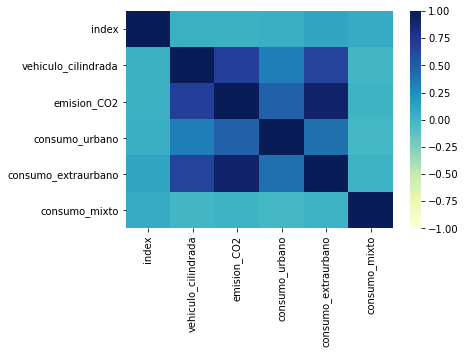

In [446]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

C:\Users\20173409045\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 150 missing from current font.

C:\Users\20173409045\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 150 missing from current font.



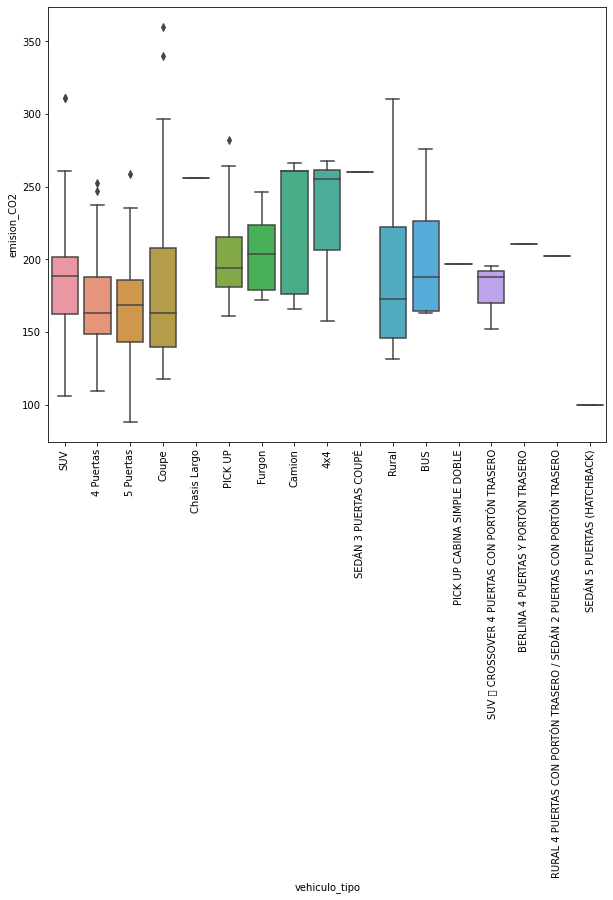

In [491]:
#El boxplot muestra que los camiones y 4x4 emiten mas CO2 comparado a otros tipos de vehiculoss

plt.figure(figsize = (10,8))
sns.boxplot(x="vehiculo_tipo", y="emision_CO2", data=df)
plt.xticks(rotation = 'vertical')


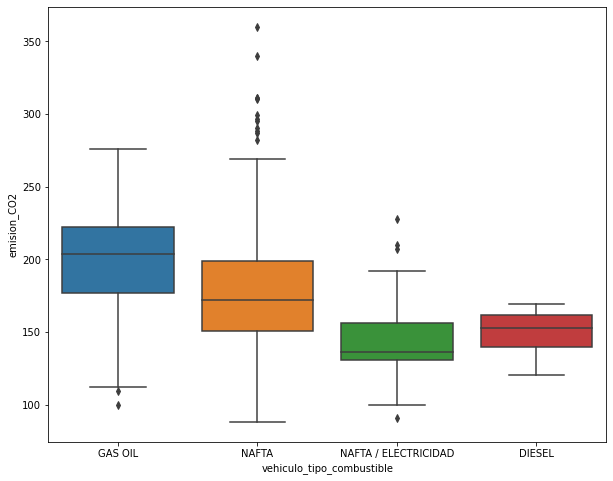

In [448]:
#El boxplot muestra que los vehiculos que usan GAS OIL emiten mas CO2
plt.figure(figsize = (10,8))
sns.boxplot(x = 'vehiculo_tipo_combustible' , y = 'emision_CO2', data = df)
plt.show()

## MODELADO

In [449]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [450]:
def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df.emision_CO2
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True , random_state = 40)
    print (X_train.shape, y_train.shape) 
    print (X_test.shape, y_test.shape)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [451]:
features_columnas = [ 'vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']

In [452]:
print (train_test_rmse( features_cols))

(304, 4) (304,)
(102, 4) (102,)
13.099058834565392


In [453]:
print (linreg.intercept_)
print (linreg.coef_)

11.327428693621442
[ 1.61344172e-02  4.92542762e-01  1.89183885e+01 -1.44267429e-02
  1.28861676e+00  3.27771215e+00  3.38240128e+00  2.34137095e+00
 -2.08846274e-11  5.70672837e+00  1.73367001e+01  6.88363126e+00
 -2.11439185e+01 -1.34977928e+01 -7.23287866e+00  1.17666038e+01
  1.24696836e+01 -4.35802059e+00 -9.34898632e+00 -1.26527813e+00
 -7.60657330e+00 -1.52629310e+01  1.46149698e-01 -4.42804920e-01
 -9.36774800e+00 -3.71048519e+00  2.58428591e+00  5.68931893e+00
  6.06354144e+00 -1.12815650e+01  4.93191875e+00  8.26561395e+00
 -1.71711782e+01 -5.84568022e+00 -1.98774162e+01 -3.54349674e+00
  3.56431015e+00  3.70699406e+00 -3.77201693e+00  7.91046709e+00
 -4.35738666e+00  2.06050466e+00  6.31147854e-01  1.10743589e+01
 -1.01706708e+01 -1.06207473e+01  2.64833927e+01  9.17498151e+00
 -1.77398809e+00 -2.38439271e+01  6.72059531e+00  1.46956057e+01
 -6.29356549e+00 -8.26941036e+00  3.00415052e+01  6.16648718e-01
  1.49192518e-01  2.81972739e-02  1.59503656e+01 -3.75545585e+00
  2.29

In [454]:
print ('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print ('MSE:', metrics.mean_squared_error(y_test,y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.898676199860429
MSE: 144.03456322533017
RMSE: 12.001440047983


In [455]:
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9278281892297295


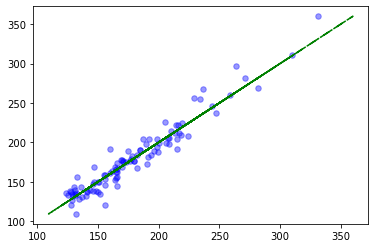

(102,)
(102,)


In [456]:
graf_lineal_model(X, y_test, y_pred)

## DUMMIES

In [457]:
df.columns

Index(['index', 'vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [458]:
tipo_df = pd.read_csv('Data/tipo_vehiculos.csv'  )
#Costo.. pero salio!!!!
tipo_df_dic = tipo_df.set_index('ID').T.to_dict('list')
#tipo_df_dic

In [459]:
df.vehiculo_tipo = df.vehiculo_tipo.replace(tipo_df_dic)

In [460]:
df.shape

(406, 13)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

C:\Users\20173409045\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning:

Glyph 150 missing from current font.

C:\Users\20173409045\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning:

Glyph 150 missing from current font.



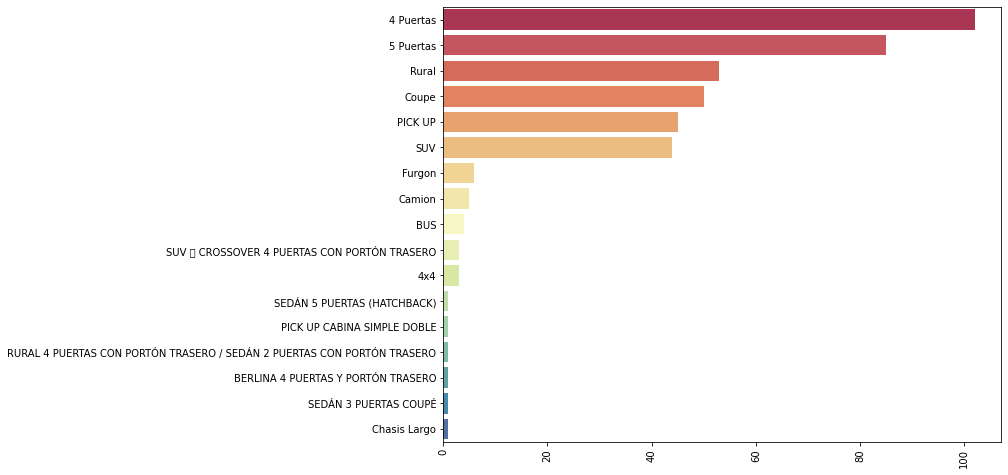

In [461]:
mkI = df['vehiculo_tipo'].value_counts().index
mkV = df['vehiculo_tipo'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkV,mkI, orient = 'h', palette='Spectral')
plt.xticks(rotation='vertical')

In [462]:
df.columns

Index(['index', 'vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [463]:
df.head(10)

,index,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,1,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,2,RENAULT,DUSTER 2.0 16v,5 Puertas,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,3,RENAULT,DUSTER 2.0 16v 4X4,5 Puertas,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,4,CITROËN,DS4,Coupe,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70
5,5,CITROËN,DS3,Coupe,4x2,1598.0,MANUAL,NAFTA,EURO V,140.80,8.20,4.70,6.00
6,6,LEXUS,GS450H,4 Puertas,4x2,3456.0,CVT,NAFTA / ELECTRICIDAD,EURO V,145.00,6.60,5.90,6.20
7,7,CITROËN,DS3,Coupe,4x2,1598.0,MANUAL,NAFTA,EURO V,141.20,8.00,4.90,6.00
8,8,PEUGEOT,208,5 Puertas,4x2,1587.0,MANUAL,NAFTA,EURO V,173.77,10.17,5.84,7.44
9,9,TOYOTA,RAV4,SUV,4x4,2494.0,AUTOMATICA,NAFTA,EURO V,197.70,11.40,6.90,8.50


In [464]:
categorical_columns = ['vehiculo_tipo','vehiculo_marca', 'vehiculo_traccion', 'vehiculo_tipo_transmision', 'vehiculo_standard_emision',
   'vehiculo_tipo_combustible']

In [465]:
encoder_categories = []

for col in categorical_columns:    
    col_categories = df[col].unique()
    encoder_categories.append(col_categories)

encoder_categories

[array(['SUV', '4 Puertas', '5 Puertas', 'Coupe', 'Chasis Largo',
        'PICK UP', 'Furgon', 'Camion', '4x4', 'SEDÁN 3 PUERTAS COUPÉ',
        'Rural', 'BUS', 'PICK UP CABINA SIMPLE DOBLE',
        'SUV \x96 CROSSOVER 4 PUERTAS CON PORTÓN TRASERO',
        'BERLINA 4 PUERTAS Y PORTÓN TRASERO',
        'RURAL 4 PUERTAS CON PORTÓN TRASERO / SEDÁN 2 PUERTAS CON PORTÓN TRASERO',
        'SEDÁN 5 PUERTAS (HATCHBACK)'], dtype=object),
 array(['TOYOTA', 'RENAULT', 'CITROËN', 'LEXUS', 'PEUGEOT', 'FORD',
        'PEUGEOT / CITROËN', 'HYUNDAI', 'SUZUKI', 'CHEVROLET', 'LIFAN',
        'BMW', 'CITROËN / DS', 'HONDA', 'NISSAN', 'FIAT', 'CHERY',
        'VOLKSWAGEN', 'ALFA ROMEO', 'FAW', 'MERCEDES-BENZ', 'JEEP',
        'LAND ROVER', 'JAC', 'VOLVO', 'SHINERAY', 'CHANGAN', 'DS', 'MINI',
        'DOMY', 'BORGWARD', 'PORSCHE', 'AUDI', 'BAIC', 'ZANELLA', 'RAM',
        'FOTON', 'MASERATI', 'SUBARU', 'HAVAL', 'ISUZU', 'DONGFENG',
        'MERCEDES-AMG', 'MITSUBISHI', 'ZOTYE', 'KIA', 'GREAT WALL', 'KYC'

In [466]:
encoder_categories
from sklearn.preprocessing import OneHotEncoder

In [467]:
encoder = OneHotEncoder(categories = encoder_categories, sparse=False)
encoder = encoder.fit(df[categorical_columns])

In [468]:
X_encoded = encoder.transform(df[categorical_columns])

In [469]:
X_dummies = pd.DataFrame(X_encoded, columns = encoder.get_feature_names(categorical_columns))
X_dummies

,vehiculo_tipo_SUV,vehiculo_tipo_4 Puertas,vehiculo_tipo_5 Puertas,vehiculo_tipo_Coupe,vehiculo_tipo_Chasis Largo,vehiculo_tipo_PICK UP,vehiculo_tipo_Furgon,vehiculo_tipo_Camion,vehiculo_tipo_4x4,vehiculo_tipo_SEDÁN 3 PUERTAS COUPÉ,vehiculo_tipo_Rural,vehiculo_tipo_BUS,vehiculo_tipo_PICK UP CABINA SIMPLE DOBLE,vehiculo_tipo_SUV  CROSSOVER 4 PUERTAS CON PORTÓN TRASERO,vehiculo_tipo_BERLINA 4 PUERTAS Y PORTÓN TRASERO,vehiculo_tipo_RURAL 4 PUERTAS CON PORTÓN TRASERO / SEDÁN 2 PUERTAS CON PORTÓN TRASERO,vehiculo_tipo_SEDÁN 5 PUERTAS (HATCHBACK),vehiculo_marca_TOYOTA,vehiculo_marca_RENAULT,vehiculo_marca_CITROËN,vehiculo_marca_LEXUS,vehiculo_marca_PEUGEOT,vehiculo_marca_FORD,vehiculo_marca_PEUGEOT / CITROËN,vehiculo_marca_HYUNDAI,vehiculo_marca_SUZUKI,vehiculo_marca_CHEVROLET,vehiculo_marca_LIFAN,vehiculo_marca_BMW,vehiculo_marca_CITROËN / DS,vehiculo_marca_HONDA,vehiculo_marca_NISSAN,vehiculo_marca_FIAT,vehiculo_marca_CHERY,vehiculo_marca_VOLKSWAGEN,vehiculo_marca_ALFA ROMEO,vehiculo_marca_FAW,vehiculo_marca_MERCEDES-BENZ,vehiculo_marca_JEEP,vehiculo_marca_LAND ROVER,vehiculo_marca_JAC,vehiculo_marca_VOLVO,vehiculo_marca_SHINERAY,vehiculo_marca_CHANGAN,vehiculo_marca_DS,vehiculo_marca_MINI,vehiculo_marca_DOMY,vehiculo_marca_BORGWARD,vehiculo_marca_PORSCHE,vehiculo_marca_AUDI,vehiculo_marca_BAIC,vehiculo_marca_ZANELLA,vehiculo_marca_RAM,vehiculo_marca_FOTON,vehiculo_marca_MASERATI,vehiculo_marca_SUBARU,vehiculo_marca_HAVAL,vehiculo_marca_ISUZU,vehiculo_marca_DONGFENG,vehiculo_marca_MERCEDES-AMG,vehiculo_marca_MITSUBISHI,vehiculo_marca_ZOTYE,vehiculo_marca_KIA,vehiculo_marca_GREAT WALL,vehiculo_marca_KYC,vehiculo_marca_FERRARI,vehiculo_traccion_4x4,vehiculo_traccion_4x2,vehiculo_traccion_4x2 - 4x4,vehiculo_tipo_transmision_AUTOMATICA,vehiculo_tipo_transmision_CVT,vehiculo_tipo_transmision_MANUAL,vehiculo_tipo_transmision_CTT,vehiculo_tipo_transmision_MANUAL AUTOMATIZADA,vehiculo_tipo_transmision_E-CVT (Hibrida controlada electrónicamente),vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI,vehiculo_standard_emision_EURO VI b,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [470]:
X_numerical = df[['vehiculo_cilindrada', 'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto']]

In [471]:
#X = pd.concat([df, X_dummies], axis = 1)
X = pd.concat([X_numerical, X_dummies], axis = 1)

In [472]:
X.shape

(406, 92)

In [473]:
X.head()

,vehiculo_cilindrada,consumo_urbano,consumo_extraurbano,consumo_mixto,vehiculo_tipo_SUV,vehiculo_tipo_4 Puertas,vehiculo_tipo_5 Puertas,vehiculo_tipo_Coupe,vehiculo_tipo_Chasis Largo,vehiculo_tipo_PICK UP,vehiculo_tipo_Furgon,vehiculo_tipo_Camion,vehiculo_tipo_4x4,vehiculo_tipo_SEDÁN 3 PUERTAS COUPÉ,vehiculo_tipo_Rural,vehiculo_tipo_BUS,vehiculo_tipo_PICK UP CABINA SIMPLE DOBLE,vehiculo_tipo_SUV  CROSSOVER 4 PUERTAS CON PORTÓN TRASERO,vehiculo_tipo_BERLINA 4 PUERTAS Y PORTÓN TRASERO,vehiculo_tipo_RURAL 4 PUERTAS CON PORTÓN TRASERO / SEDÁN 2 PUERTAS CON PORTÓN TRASERO,vehiculo_tipo_SEDÁN 5 PUERTAS (HATCHBACK),vehiculo_marca_TOYOTA,vehiculo_marca_RENAULT,vehiculo_marca_CITROËN,vehiculo_marca_LEXUS,vehiculo_marca_PEUGEOT,vehiculo_marca_FORD,vehiculo_marca_PEUGEOT / CITROËN,vehiculo_marca_HYUNDAI,vehiculo_marca_SUZUKI,vehiculo_marca_CHEVROLET,vehiculo_marca_LIFAN,vehiculo_marca_BMW,vehiculo_marca_CITROËN / DS,vehiculo_marca_HONDA,vehiculo_marca_NISSAN,vehiculo_marca_FIAT,vehiculo_marca_CHERY,vehiculo_marca_VOLKSWAGEN,vehiculo_marca_ALFA ROMEO,vehiculo_marca_FAW,vehiculo_marca_MERCEDES-BENZ,vehiculo_marca_JEEP,vehiculo_marca_LAND ROVER,vehiculo_marca_JAC,vehiculo_marca_VOLVO,vehiculo_marca_SHINERAY,vehiculo_marca_CHANGAN,vehiculo_marca_DS,vehiculo_marca_MINI,vehiculo_marca_DOMY,vehiculo_marca_BORGWARD,vehiculo_marca_PORSCHE,vehiculo_marca_AUDI,vehiculo_marca_BAIC,vehiculo_marca_ZANELLA,vehiculo_marca_RAM,vehiculo_marca_FOTON,vehiculo_marca_MASERATI,vehiculo_marca_SUBARU,vehiculo_marca_HAVAL,vehiculo_marca_ISUZU,vehiculo_marca_DONGFENG,vehiculo_marca_MERCEDES-AMG,vehiculo_marca_MITSUBISHI,vehiculo_marca_ZOTYE,vehiculo_marca_KIA,vehiculo_marca_GREAT WALL,vehiculo_marca_KYC,vehiculo_marca_FERRARI,vehiculo_traccion_4x4,vehiculo_traccion_4x2,vehiculo_traccion_4x2 - 4x4,vehiculo_tipo_transmision_AUTOMATICA,vehiculo_tipo_transmision_CVT,vehiculo_tipo_transmision_MANUAL,vehiculo_tipo_transmision_CTT,vehiculo_tipo_transmision_MANUAL AUTOMATIZADA,vehiculo_tipo_transmision_E-CVT (Hibrida controlada electrónicamente),vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI,vehiculo_standard_emision_EURO VI b,vehiculo_standard_emision_EURUO V,vehiculo_standard_emision_EURO VI a,vehiculo_standard_emision_EURO V,vehiculo_standard_emision_EURO VI c,vehiculo_standard_emision_EURO VI d,vehiculo_standard_emision_EURO VI b,vehiculo_tipo_combustible_GAS OIL,vehiculo_tipo_combustible_NAFTA,vehiculo_tipo_combustible_NAFTA / ELECTRICIDAD,vehiculo_tipo_combustible_DIESEL
0,4461.0,11.56,8.94,9.90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1997.0,10.50,6.10,7.70,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1998.0,11.13,6.98,8.52,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1998.0,11.20,7.01,8.55,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [474]:
y = df.emision_CO2

In [475]:
y.shape

(406,)

In [476]:
# Instanciamos el modelo
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state = 40)
# Entrenamos el modelo 
linreg.fit(X_train, y_train)

LinearRegression()

In [477]:
y_pred = linreg.predict(X_test)

In [478]:
print ('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print ('MSE:', metrics.mean_squared_error(y_test,y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.898676199860429
MSE: 144.03456322533017
RMSE: 12.001440047983


In [479]:
print ('R2:', metrics.r2_score(y_test, y_pred))

R2: 0.9278281892297295


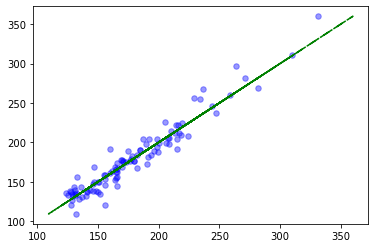

(102,)
(102,)


In [480]:
graf_lineal_model(X, y_test, y_pred)

In [481]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

In [482]:
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(data, ground_truth_data,test_size=0.3,random_state =1 )
model = LinearRegression()
parameters = {'fit_intercept':[True], 'normalize':[True],}
grid = GridSearchCV(model,parameters, cv=3)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)
print("Residual sum of squares: %.2f"% np.mean((grid.predict(X_test) - y_test) ** 2))

r2 / variance :  -8.264735373294696e+26
Residual sum of squares: 336729751424175770517372928.00


In [483]:
reg = LinearRegression()
parameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}
clf3 = GridSearchCV(reg, parameters)
clf3.fit(X, y)
print ("r2 / variance : ", grid.best_score_)

r2 / variance :  -8.264735373294696e+26


In [484]:
scores = cross_val_score(reg, X_train, y_train, cv = 5) #cv is the number of folds, scores will give an array of scores
print (scores, np.mean(scores), np.std(scores))
print ('R2:', metrics.r2_score(y_test, y_pred))

[ 8.60986837e-01 -4.34376565e+00  6.87584689e-01 -2.91368720e+03
  8.76054341e-01] -583.1212680081117 1165.2846763604557
R2: 0.9278281892297295


In [485]:
predictions = cross_val_predict(reg, X_test, y_test, cv = 5)
#predictions
#accuracy = metrics.r2_scores(y_test, predictions)
print ('R2:', metrics.r2_score(y_test, predictions))

R2: 0.9824629097891908


In [486]:
def graf_lineal_model(X, y, y_pred):
    # Graficamos el modelo
    plt.scatter(y_pred, y, s=30, alpha=0.4, c='b')
    plt.plot(y,y, '-.',c='g')
    plt.show()
    print(y.shape)
    print(y_pred.shape)
    return

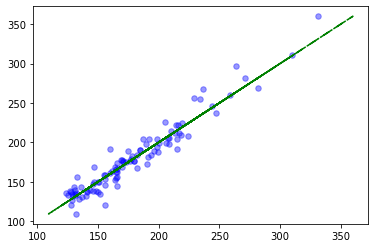

(102,)
(102,)


In [487]:
 graf_lineal_model(X, y_test, y_pred)

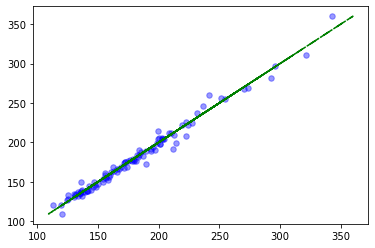

(102,)
(102,)


In [488]:
 graf_lineal_model(X, y_test, predictions)

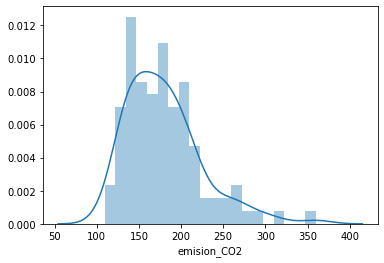

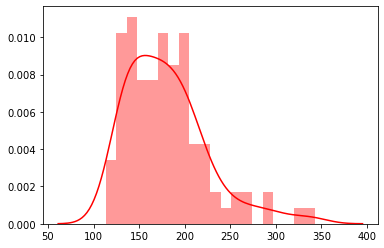

In [489]:
sns.distplot(y_test, bins = 20)
plt.show()
sns.distplot(predictions, bins = 20, color = 'red')
plt.show()

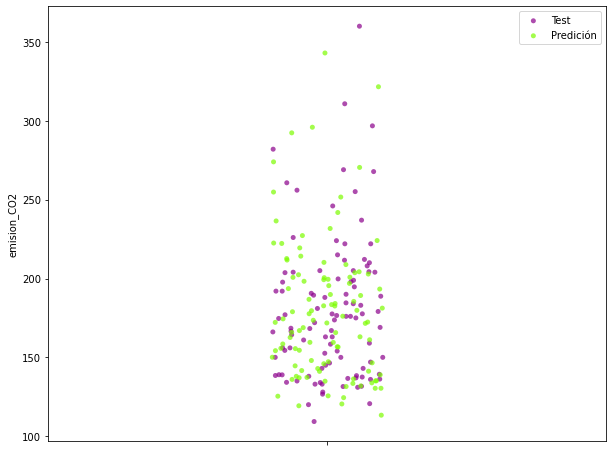

In [490]:
f, ax = plt.subplots(1, figsize=(10, 8), sharex=True)

sns.stripplot(y = y_test, color = 'darkmagenta', alpha = 0.7, label = 'Test')
sns.stripplot(y = predictions, color = 'lawngreen', alpha = 0.7, label = 'Predición')
plt.legend()
plt.show()